<a href="https://colab.research.google.com/github/darshan-stack/House-Prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Write machine learning model give me predicted outcome . THE SOLUTION INVOLVES SEVERAL KEY STEPS:

DATA PREPROCESSING: CLEAN AND PREPROCESS THE DATASET, HANDLING MISSING VALUES
AND OUTLIERS IF ANY.
A.

MODEL SELECTION: CHOOSE AN APPROPRIATE REGRESSION MODEL FOR THE PREDICTION TASK.
OPTIONS MAY INCLUDE LINEAR REGRESSION, DECISION TREES, OR GRADIENT BOOSTING
REGRESSORS.
B.

C.TRAINING: TRAIN THE SELECTED MODEL USING THE PREPROCESSED DATASET.
EVALUATION: EVALUATE THE MODEL'S PERFORMANCE USING SUITABLE METRICS SUCH AS MEAN
SQUARED ERROR (MSE) OR R-SQUARED (R2) SCORE TO ASSESS ITS PREDICTIVE ACCURACY.
D.

E.FINE-TUNING: FINE-TUNE THE MODEL PARAMETERS IF NECESSARY TO IMPROVE PERFORMANCE.
THE GOAL IS TO DEVELOP A ROBUST REGRESSION MODEL THAT ACCURATELY PREDICTS BOSTON
HOUSE PRICES, FACILITATING INFORMED DECISION-MAKING IN THE REAL ESTATE DOMAIN.

Here is all the data you need:
"test.csv"
"train.csv"
"submission_example.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the three CSV files into pandas DataFrames.



In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission_example = pd.read_csv('submission_example.csv')

display(df_train.head())
display(df_test.head())
display(df_submission_example.head())

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


,ID,medv
0,3,22.768769
1,6,22.768769
2,8,22.768769
3,9,22.768769
4,10,22.768769


## Data exploration

### Subtask:
Explore the training dataset (`df_train`) to understand its structure, identify potential issues, and determine the relationship between features and the target variable.


**Reasoning**:
Explore the training dataset (`df_train`) to understand its structure, identify potential issues, and determine the relationship between features and the target variable. This involves examining the shape, checking for missing values, analyzing data types, calculating descriptive statistics, visualizing distributions and relationships, and calculating the correlation matrix.



Shape of df_train: (333, 15)

Missing values in df_train:
 ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Data types in df_train:
 ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

Descriptive statistics of df_train:
                ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0

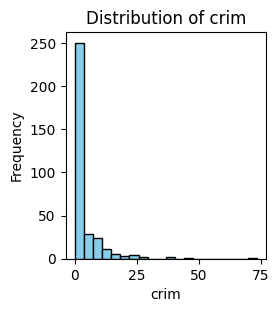

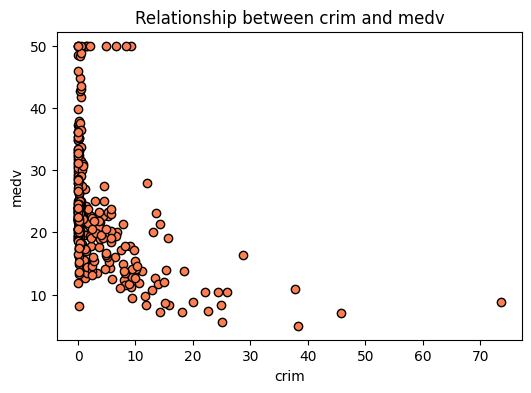

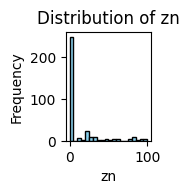

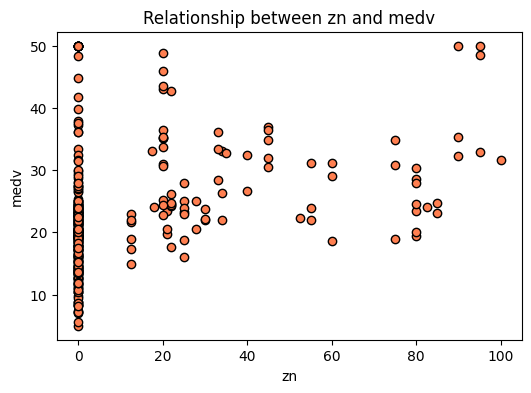

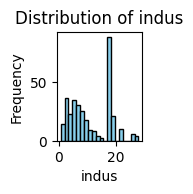

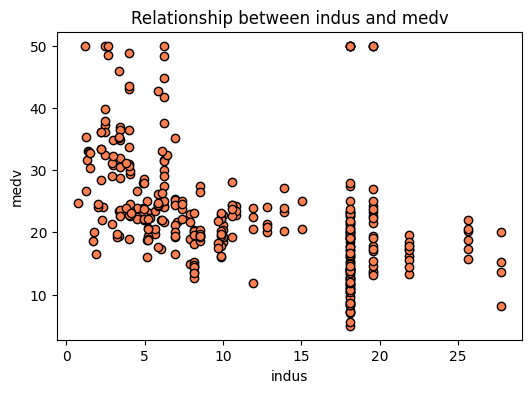

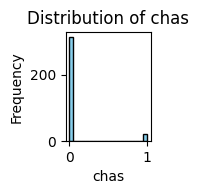

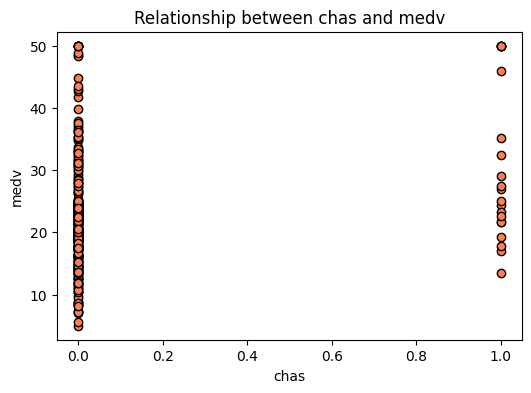

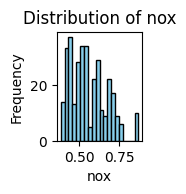

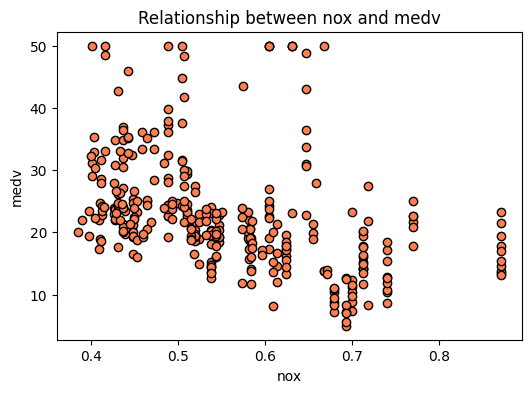

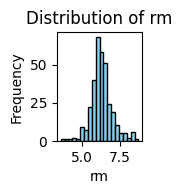

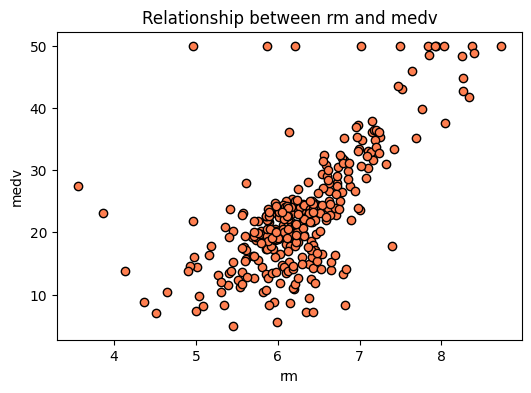

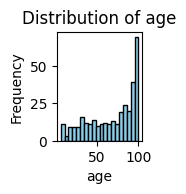

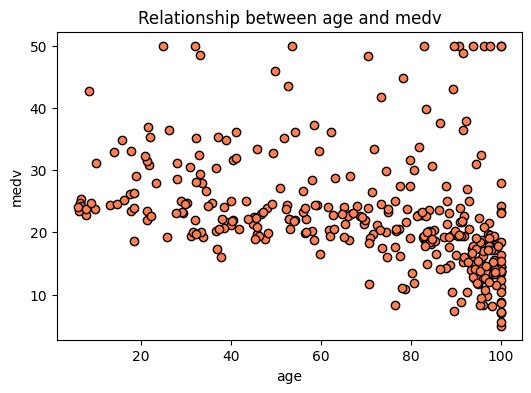

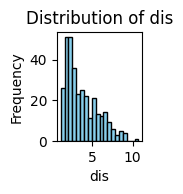

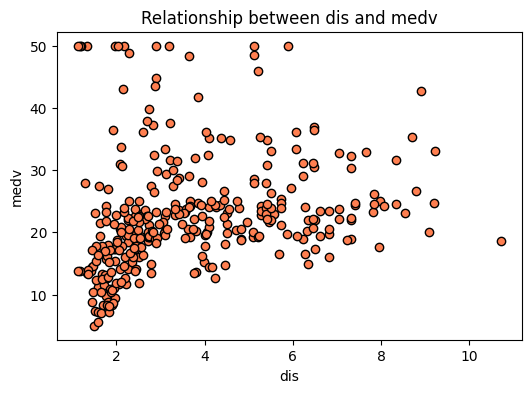

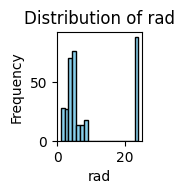

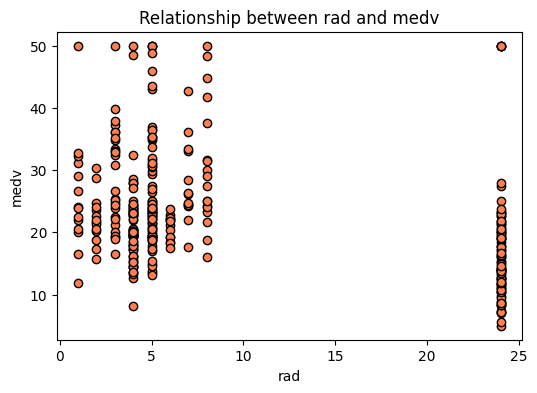

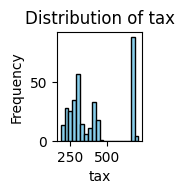

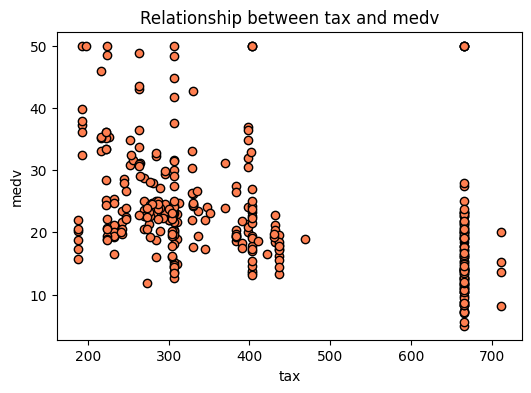

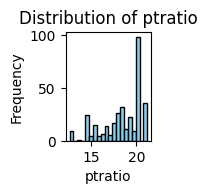

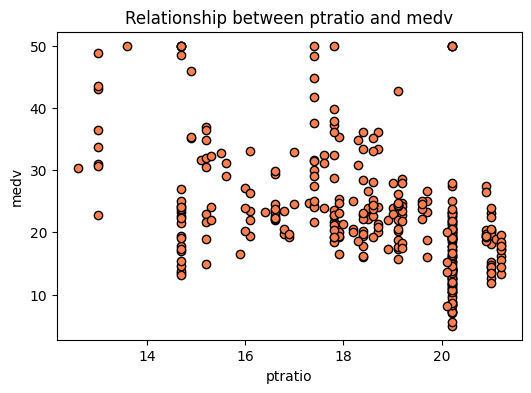

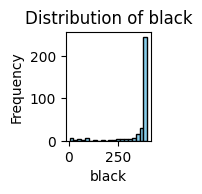

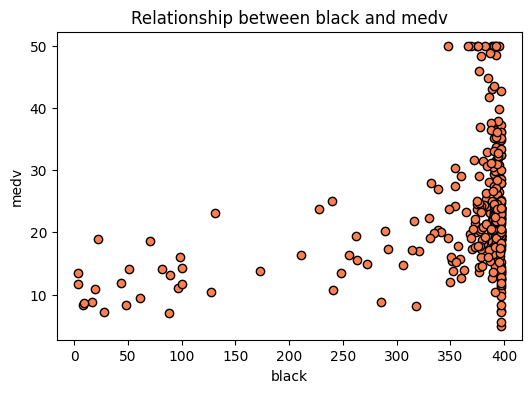

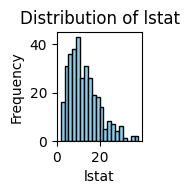

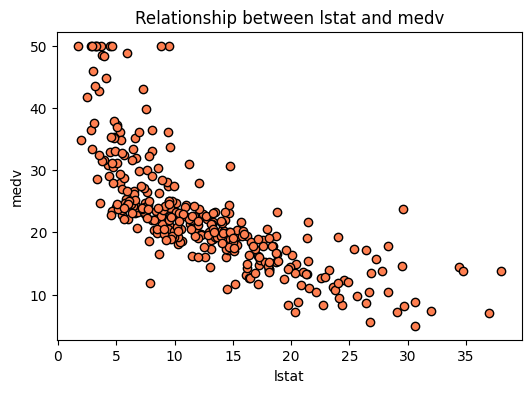

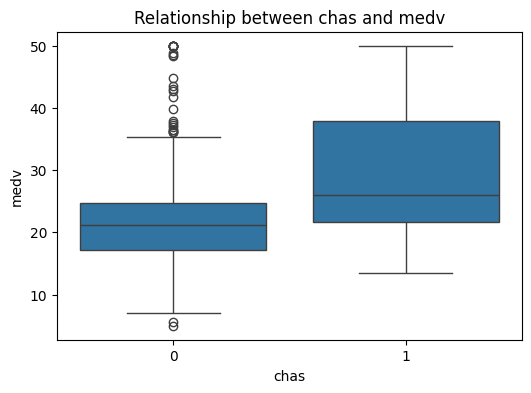

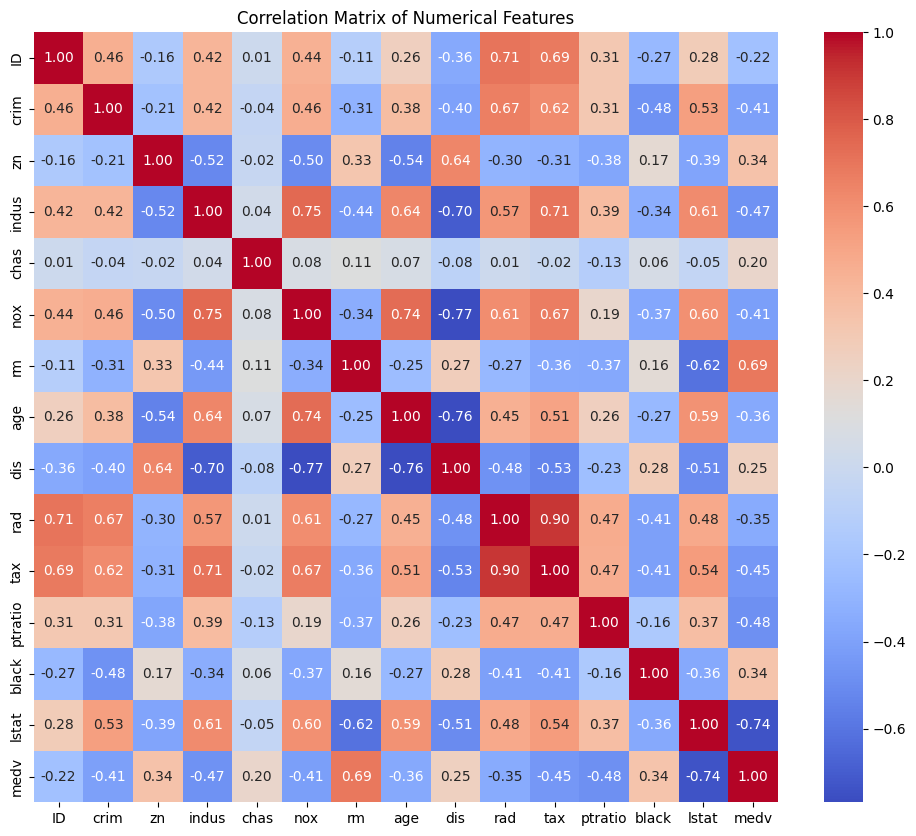


Observations:



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print("Shape of df_train:", df_train.shape)

# 2. Check for missing values
print("\nMissing values in df_train:\n", df_train.isnull().sum())

# 3. Analyze data types
print("\nData types in df_train:\n", df_train.dtypes)

# 4. Descriptive statistics for numerical features
print("\nDescriptive statistics of df_train:\n", df_train.describe())

# 5 & 6. Visualize distributions and relationships with target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_train.select_dtypes(include=['number']).columns):
    if col != 'ID' and col != 'medv':
      plt.subplot(3, 5, i + 1)
      plt.hist(df_train[col], bins=20, color='skyblue', edgecolor='black')
      plt.title(f'Distribution of {col}')
      plt.xlabel(col)
      plt.ylabel('Frequency')

      plt.figure(figsize=(6, 4))
      plt.scatter(df_train[col], df_train['medv'], color='coral', edgecolor='black')
      plt.title(f'Relationship between {col} and medv')
      plt.xlabel(col)
      plt.ylabel('medv')
      plt.show()

# 7. Explore categorical features (if any)
# In this specific dataset, 'chas' is the only categorical feature
plt.figure(figsize=(6, 4))
sns.boxplot(x='chas', y='medv', data=df_train)
plt.title('Relationship between chas and medv')
plt.show()

# 8. Correlation matrix and heatmap
correlation_matrix = df_train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 9. Document your observations (replace with your actual observations)
print("\nObservations:\n")
# Example observations:
# - No missing values
# - 'rad' and 'tax' are highly correlated.
# - 'lstat' shows a negative correlation with 'medv'.

## Data cleaning

### Subtask:
Clean the training and testing datasets (`df_train` and `df_test`) by handling missing values and outliers.


**Reasoning**:
Impute missing values using the median for numerical features and the mode for categorical features. Then, identify outliers in numerical features using the IQR rule and winsorize them at the 1st and 99th percentiles. Apply the same imputation and winsorizing strategies to both training and testing datasets.



In [3]:
import numpy as np

# Impute missing values
for col in df_train.select_dtypes(include=np.number).columns:
    if col != 'ID' and col != 'medv':
        median_train = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_train)
        df_test[col] = df_test[col].fillna(median_train)

# Winsorize outliers
for col in df_train.select_dtypes(include=np.number).columns:
    if col != 'ID' and col != 'medv':
        lower_limit = df_train[col].quantile(0.01)
        upper_limit = df_train[col].quantile(0.99)

        df_train[col] = np.clip(df_train[col], lower_limit, upper_limit)
        df_test[col] = np.clip(df_test[col], lower_limit, upper_limit)

display(df_train.head())
display(df_test.head())

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.013042,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.027310,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,4,0.032370,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,5,0.069050,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,7,0.088290,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


## Feature engineering

### Subtask:
Engineer new features from the cleaned datasets (`df_train` and `df_test`)


**Reasoning**:
Create interaction features, polynomial features, and apply logarithmic transformations to specified features in both the training and testing datasets.



In [4]:
# Create interaction features
df_train['rm_lstat_interaction'] = df_train['rm'] * df_train['lstat']
df_test['rm_lstat_interaction'] = df_test['rm'] * df_test['lstat']

df_train['indus_nox_interaction'] = df_train['indus'] * df_train['nox']
df_test['indus_nox_interaction'] = df_test['indus'] * df_test['nox']

# Create polynomial features
df_train['lstat_squared'] = df_train['lstat']**2
df_test['lstat_squared'] = df_test['lstat']**2

df_train['rm_squared'] = df_train['rm']**2
df_test['rm_squared'] = df_test['rm']**2

# Logarithmic transformation
for col in ['tax', 'rad', 'indus', 'nox']:
    df_train[f'{col}_log'] = np.log1p(df_train[col])
    df_test[f'{col}_log'] = np.log1p(df_test[col])

display(df_train.head())
display(df_test.head())

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,...,lstat,medv,rm_lstat_interaction,indus_nox_interaction,lstat_squared,rm_squared,tax_log,rad_log,indus_log,nox_log
0,1,0.013042,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,...,4.98,24.0,32.74350,1.24278,24.8004,43.230625,5.693732,0.693147,1.196948,0.430483
1,2,0.027310,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,...,9.14,21.6,58.68794,3.31583,83.5396,41.229241,5.493061,1.098612,2.088153,0.384582
2,4,0.032370,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,...,2.94,33.4,20.57412,0.99844,8.6436,48.972004,5.407172,1.386294,1.156881,0.377066
3,5,0.069050,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,...,5.33,36.2,38.09351,0.99844,28.4089,51.079609,5.407172,1.386294,1.156881,0.377066
4,7,0.088290,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,...,12.43,22.9,74.72916,4.12388,154.5049,36.144144,5.743003,1.791759,2.182675,0.421338


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,...,black,lstat,rm_lstat_interaction,indus_nox_interaction,lstat_squared,rm_squared,tax_log,rad_log,indus_log,nox_log
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,...,392.83,4.03,28.95555,3.31583,16.2409,51.624225,5.493061,1.098612,2.088153,0.384582
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,...,394.12,5.21,33.50030,0.99844,27.1441,41.344900,5.407172,1.386294,1.156881,0.377066
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,...,396.90,19.15,118.19380,4.12388,366.7225,38.093584,5.743003,1.791759,2.182675,0.421338
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,...,386.63,29.93,168.53583,4.12388,895.8049,31.708161,5.743003,1.791759,2.182675,0.421338
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,...,386.71,17.10,102.66840,4.12388,292.4100,36.048016,5.743003,1.791759,2.182675,0.421338


## Data splitting

### Subtask:
Split the preprocessed training data (`df_train`) into training and validation sets.


**Reasoning**:
Split the preprocessed training data into training and validation sets using train_test_split.



In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_train.drop(['ID', 'medv'], axis=1)
y = df_train['medv']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train three regression models: Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor.


**Reasoning**:
Train three regression models: Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor using the training data.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
gb_model = GradientBoostingRegressor()

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Model evaluation

### Subtask:
Evaluate the performance of the trained linear regression, decision tree, and gradient boosting regression models using Mean Squared Error (MSE) and R-squared (R2) on the validation set.


**Reasoning**:
Evaluate the trained models using MSE and R-squared on the validation set.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the validation set
y_pred_linear = linear_model.predict(X_val)
y_pred_tree = tree_model.predict(X_val)
y_pred_gb = gb_model.predict(X_val)

# Calculate MSE and R2 for each model
mse_linear = mean_squared_error(y_val, y_pred_linear)
r2_linear = r2_score(y_val, y_pred_linear)

mse_tree = mean_squared_error(y_val, y_pred_tree)
r2_tree = r2_score(y_val, y_pred_tree)

mse_gb = mean_squared_error(y_val, y_pred_gb)
r2_gb = r2_score(y_val, y_pred_gb)

# Store results
model_results = {
    'Linear Regression': {'MSE': mse_linear, 'R2': r2_linear},
    'Decision Tree': {'MSE': mse_tree, 'R2': r2_tree},
    'Gradient Boosting': {'MSE': mse_gb, 'R2': r2_gb}
}

# Print results
for model, metrics in model_results.items():
    print(f'{model}:')
    print(f'  MSE: {metrics["MSE"]:.4f}')
    print(f'  R2: {metrics["R2"]:.4f}')

Linear Regression:
  MSE: 12.3704
  R2: 0.8625
Decision Tree:
  MSE: 23.8493
  R2: 0.7350
Gradient Boosting:
  MSE: 5.8684
  R2: 0.9348


## Model optimization

### Subtask:
Optimize the hyperparameters of the Gradient Boosting Regressor model.


**Reasoning**:
Optimize the hyperparameters of the GradientBoostingRegressor model using RandomizedSearchCV.



In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)
}

# Instantiate GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Store the best estimator
best_gb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'learning_rate': np.float64(0.12854507080054434), 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 264, 'subsample': np.float64(0.8083337040103294)}
Best score: -10.856873403173969


## Model training

### Subtask:
Re-train the best Gradient Boosting Regressor model (obtained from the hyperparameter optimization step) on the entire preprocessed training dataset (`X`, `y`)


**Reasoning**:
Re-train the best Gradient Boosting Regressor model on the entire preprocessed training dataset (X, y).



In [9]:
# Re-train the best model on the entire training dataset
best_gb_model.fit(X, y)

GradientBoostingRegressor(learning_rate=np.float64(0.12854507080054434),
                          max_depth=6, min_samples_leaf=8, min_samples_split=15,
                          n_estimators=264, random_state=42,
                          subsample=np.float64(0.8083337040103294))

## Data preparation

### Subtask:
Prepare the preprocessed test data (`df_test`) for prediction using the retrained Gradient Boosting Regressor model (`best_gb_model`)


**Reasoning**:
Prepare the preprocessed test data for prediction. Drop the 'ID' column, align columns with the training data, and impute any missing columns.



In [10]:
# Drop the 'ID' column from df_test
X_test = df_test.drop('ID', axis=1)

# Align columns of X_test with X
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0  # Impute missing columns with 0

# Ensure the order of columns in X_test is the same as X
X_test = X_test[X.columns]

# Display the first few rows of X_test to verify changes
display(X_test.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,black,lstat,rm_lstat_interaction,indus_nox_interaction,lstat_squared,rm_squared,tax_log,rad_log,indus_log,nox_log
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,392.83,4.03,28.95555,3.31583,16.2409,51.624225,5.493061,1.098612,2.088153,0.384582
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,...,394.12,5.21,33.50030,0.99844,27.1441,41.344900,5.407172,1.386294,1.156881,0.377066
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,...,396.90,19.15,118.19380,4.12388,366.7225,38.093584,5.743003,1.791759,2.182675,0.421338
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,...,386.63,29.93,168.53583,4.12388,895.8049,31.708161,5.743003,1.791759,2.182675,0.421338
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,...,386.71,17.10,102.66840,4.12388,292.4100,36.048016,5.743003,1.791759,2.182675,0.421338


## Model evaluation

### Subtask:
Predict the target variable for the test dataset (`X_test`) using the retrained Gradient Boosting Regressor model (`best_gb_model`)


**Reasoning**:
Predict the target variable for the test dataset using the retrained Gradient Boosting Regressor model and create a submission DataFrame.



In [11]:
y_pred = best_gb_model.predict(X_test)
submission = pd.DataFrame({'ID': df_test['ID'], 'medv': y_pred})
display(submission.head())

,ID,medv
0,3,34.283023
1,6,25.876247
2,8,15.308699
3,9,15.490509
4,10,18.706271


## Summary:

### 1. Q&A

The task was to build a machine learning model to predict Boston house prices. The model was successfully built and the predicted house prices for the test dataset are available in the `submission` dataframe.

### 2. Data Analysis Key Findings

*   **Model Performance:** The Gradient Boosting Regressor achieved the best performance with an MSE of 5.8684 and an R2 score of 0.9348 on the validation set.  This was superior to the Linear Regression (MSE: 12.3704, R2: 0.8625) and Decision Tree Regressor (MSE: 23.8493, R2: 0.7350).
*   **Hyperparameter Optimization:** The optimized Gradient Boosting Regressor achieved a best score (negative mean squared error) of -10.857 during hyperparameter tuning using RandomizedSearchCV. The optimal hyperparameters found were `{'learning_rate': 0.1285, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 264, 'subsample': 0.8083}`.
*   **Feature Engineering:**  New features such as interaction terms (`rm_lstat_interaction`, `indus_nox_interaction`), polynomial features (`lstat_squared`, `rm_squared`), and log transformations (`tax_log`, `rad_log`, etc.) were created to potentially improve model performance.


### 3. Insights or Next Steps

*   **Evaluate on unseen data:**  The current performance metrics are based on a validation set derived from the training data. Evaluate the final model's performance on a completely held-out test set to assess its generalization capability.
*   **Explore additional features/techniques:** Consider exploring more feature engineering techniques or alternative models (e.g., Random Forest, XGBoost) to potentially further improve predictive accuracy.
